Name: Amrita Sinha Roy 
Student ID: 501306770

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/wce_endoscopy_dataset/

/content/drive/MyDrive/wce_endoscopy_dataset


In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace test/0_normal/test_normal_ (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Another efficient net with attention

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Multiply, Conv2D, Activation, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Data generator for training, validation, and testing
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load datasets
train_generator = datagen.flow_from_directory(
    "train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)
val_generator = datagen.flow_from_directory(
    "val",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)
test_generator = datagen.flow_from_directory(
    "test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
)

# Attention mechanism
def attention_layer(inputs):
    """Simple attention mechanism to focus on important features."""
    # Global Average Pooling
    attention = GlobalAveragePooling2D()(inputs)
    # Dense Layer
    attention = Dense(K.int_shape(inputs)[-1] // 4, activation="relu")(attention)
    attention = Dense(K.int_shape(inputs)[-1], activation="sigmoid")(attention)
    # Reshape to match input dimensions
    attention = Reshape([1, 1, K.int_shape(inputs)[-1]])(attention)
    # Apply attention (multiply input features by attention weights)
    attention = Multiply()([inputs, attention])
    return attention

# Model architecture with EfficientNetB0 and attention
input_tensor = Input(shape=(224, 224, 3))
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=input_tensor)

# Add attention mechanism
x = base_model.output
x = attention_layer(x)  # Apply attention
x = GlobalAveragePooling2D()(x)  # Pooling layer
x = Dense(256, activation="relu")(x)  # Fully connected layer
output_tensor = Dense(train_generator.num_classes, activation="softmax")(x)  # Output layer

# Define the final model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save("efficientnetb0_with_attention.h5")


Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1353s 13s/step - accuracy: 0.8321 - loss: 0.7452 - val_accuracy: 0.2500 - val_loss: 1.3888
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1330s 13s/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.2480 - val_loss: 1.3919
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1300s 12s/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.2380 - val_loss: 1.3865
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1254s 13s/step - accuracy: 0.9973 - loss: 0.0135 - val_accuracy: 0.1070 - val_loss: 1.5809
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1302s 13s/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.5210 - val_loss: 1.4123
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1243s 12s/step - accuracy: 0.9984 - loss: 0.0049 - val_accuracy: 0.7045 - val_loss: 1.1488
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1258s 13s/step - accuracy: 0.9975 - loss: 0.0085 - val_accuracy: 0.7735 - val_loss: 0.8835
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1252s 12s/step - accuracy: 0.9987 - loss: 0.0060 - val

Test Loss: 0.19042599201202393
Test Accuracy: 0.9412500262260437


In [ ]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss graphs
def plot_history(history, model_name="Model"):
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()




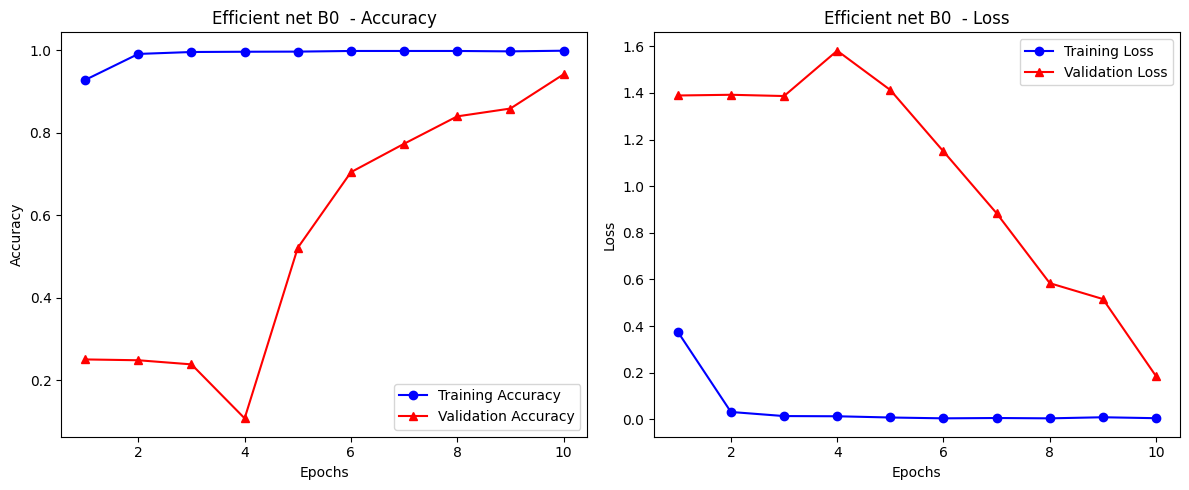

In [ ]:
# Plotting for EfficientNetB2
plot_history(history, model_name="Efficient net B0 ")